In [2]:
from importlib import reload
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

## loading activity dict

In [3]:
file = '../../data/processed/pytorch.pkl'
act = pickle.load(open(file, 'rb'))
len(act)

1827

In [4]:
act

{'9407960': {18750: 1,
  18747: 1,
  18746: 3,
  18740: 1,
  18739: 2,
  18738: 2,
  18737: 6,
  18736: 3,
  18733: 2,
  18731: 2,
  18729: 1,
  18725: 1,
  18417: 1,
  18403: 1,
  18367: 1,
  18362: 1,
  18355: 3,
  18348: 2,
  18345: 2,
  18339: 1,
  18331: 1,
  18330: 1,
  18325: 1,
  18324: 1,
  18323: 2,
  18320: 2,
  18318: 4,
  18313: 1,
  18311: 1,
  18304: 1,
  18297: 1,
  18289: 1,
  18278: 1,
  18275: 3,
  18269: 4,
  18268: 1,
  18260: 1,
  18256: 1,
  18253: 1,
  18250: 1,
  18249: 3,
  18248: 7,
  18241: 2,
  18234: 1,
  18232: 2,
  18226: 1,
  18223: 1,
  18222: 1,
  18219: 1,
  18194: 1,
  18186: 2,
  18185: 1,
  18178: 1,
  18177: 1,
  18176: 1,
  18173: 2,
  18172: 1,
  18169: 1,
  18163: 3,
  18159: 2,
  18156: 1,
  18150: 2,
  18144: 1,
  18138: 1,
  18137: 2,
  18136: 3,
  18131: 1,
  18129: 4,
  18127: 1,
  18124: 2,
  18123: 1,
  18122: 2,
  18121: 1,
  18120: 3,
  18117: 3,
  18116: 1,
  18115: 3,
  18110: 1,
  18107: 1,
  18106: 2,
  18101: 3,
  18099: 3,
  180

## making activity signal from dict

In [5]:
from social_phi import get_signal

sig = get_signal(act, time_scale=1, binarize=True)
sig.shape

(1827, 3387)

## temporal phi

In [13]:
from social_phi import phi_for_act_sig

phis, phis_orig, n_users = phi_for_act_sig(sig, window=30, hop=5, base=2)
len(phis)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/social_phi/phi.py:23: RuntimeWarning: divide by zero encountered in log
  term2 = 0.5*np.sum([np.log(s_m1) - np.log(s_part_m1_m2) for s_m1, s_part_m1_m2 in zip(S_M1, S_part_M1_M2)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/social_phi/phi.py:13: RuntimeWarning: invalid value encountered in double_scalars
  prod = lambda x: x[0]*x[1]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/social_phi/phi.py:23: RuntimeWarning: invalid value encountered in double_scalars
  term2 = 0.5*np.sum([np.log(s_m1) - np.log(s_part_m1_m2) for s_m1, s_part_m1_m2 in zip(S_M1, S_part_M1_M2)])


671

In [10]:
# import time
# df = pd.read_csv('../../data/pytorch-star-history.csv', names=['repo', 'date', 'stars'])
# df['utc'] = df['date'].apply(lambda x: int(time.mktime(time.strptime(x[:-30],'%a %b %d %Y %H:%M:%S'))))
# m = min(df['utc'])
# df['day_offset'] = df['utc'].apply(lambda x: (x - m) // (24*3600))
# print(df.shape)
# df.head()

In [11]:
# plt.plot(df['day_offset']//30, df['stars'])

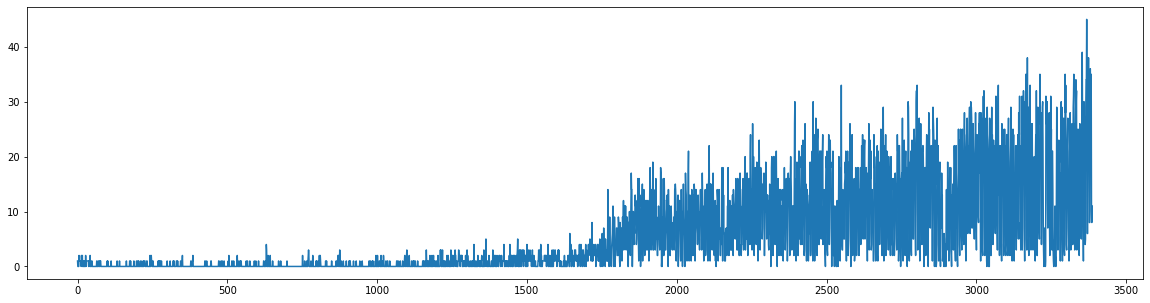

In [19]:
plt.figure(figsize=(20,5))
plt.plot(sig.sum(axis=0))

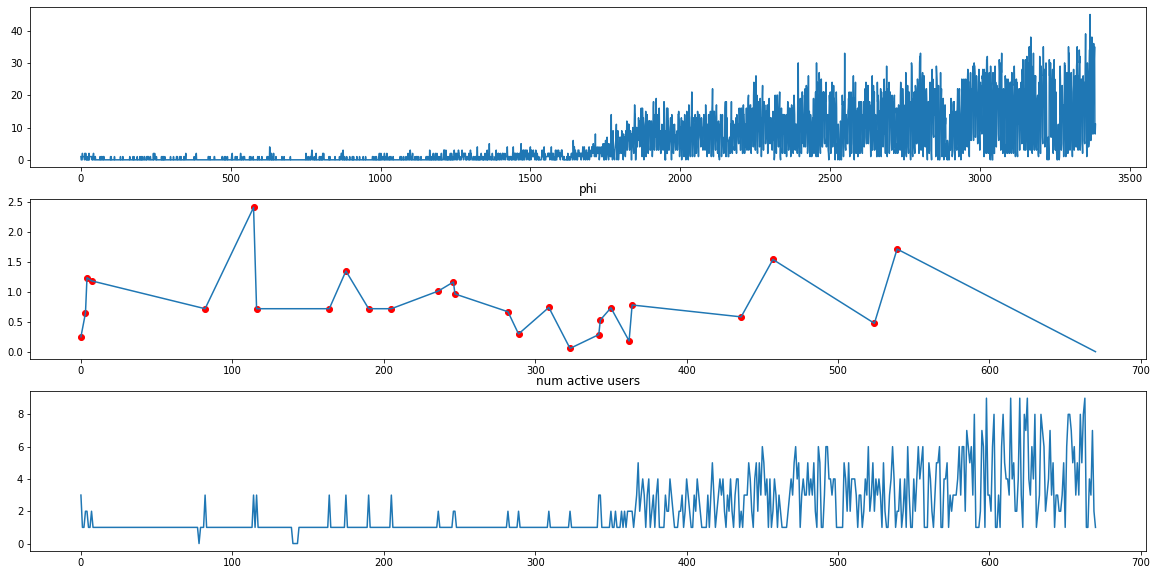

In [20]:
plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
plt.plot(sig.sum(axis=0))

plt.subplot(3,1,2)
plt.title('phi')
data = np.array(list(enumerate(phis_orig)))
plt.scatter(x=data[:,0], y=data[:,1], c='red')
plt.plot(phis)

plt.subplot(3,1,3)
plt.title('num active users')
plt.plot(n_users)


plt.show()

In [61]:
import datetime


timesteps = set()
for u in act:
    timesteps.update(act[u])
timesteps = sorted(list(timesteps))
m = timesteps[0]*24*3600
M = timesteps[-1]*24*3600
print(datetime.datetime.fromtimestamp(m), '=>', datetime.datetime.fromtimestamp(M))


hop = 10
window = 50
day = np.argmax(phis)*hop + window
offset = day*3600*24 + m
print(datetime.datetime.fromtimestamp(offset))

2012-01-25 03:30:00 => 2021-05-03 04:30:00
2012-06-23 04:30:00


In [16]:
print(
    'corr(phi, n_users) = {0:.4f}'.format(np.corrcoef(phis, n_users)[0,1])
)

corr(phi, n_users) = -0.0341


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


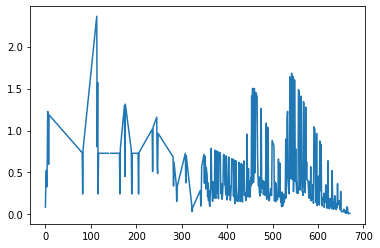

In [17]:
plt.plot(phis/n_users)
plt.show()

In [204]:
# avg_phi = []
# n_nans = []
# for h in range(1,30):
#     _, phis, _ = phi_for_act_sig(sig, window=30, hop=h, base=2)
#     avg_phi += [np.mean(phis[~np.isnan(phis)])]
#     n_nans += [np.isnan(phis).sum()/len(phis)]

# plt.plot(n_nans/lens)
# plt.plot(avg_phi)